In [7]:
from __future__ import division
import numpy as np
import pylab as pl
from scipy.integrate import quad

%matplotlib inline

# Set plot parameters to make beautiful plots
pl.rcParams['figure.figsize']  = 12, 7.5
pl.rcParams['lines.linewidth'] = 1.5
pl.rcParams['font.family']     = 'serif'
pl.rcParams['font.weight']     = 'bold'
pl.rcParams['font.size']       = 20  
pl.rcParams['font.sans-serif'] = 'serif'
pl.rcParams['text.usetex']     = True
pl.rcParams['axes.linewidth']  = 1.5
pl.rcParams['axes.titlesize']  = 'medium'
pl.rcParams['axes.labelsize']  = 'medium'

pl.rcParams['xtick.major.size'] = 8     
pl.rcParams['xtick.minor.size'] = 4     
pl.rcParams['xtick.major.pad']  = 8     
pl.rcParams['xtick.minor.pad']  = 8     
pl.rcParams['xtick.color']      = 'k'     
pl.rcParams['xtick.labelsize']  = 'medium'
pl.rcParams['xtick.direction']  = 'in'    

pl.rcParams['ytick.major.size'] = 8     
pl.rcParams['ytick.minor.size'] = 4     
pl.rcParams['ytick.major.pad']  = 8     
pl.rcParams['ytick.minor.pad']  = 8     
pl.rcParams['ytick.color']      = 'k'     
pl.rcParams['ytick.labelsize']  = 'medium'
pl.rcParams['ytick.direction']  = 'in'

In [8]:
N  = 64
Nt = 100
dx = 1./N
i  = np.arange(0, N, 1)
x  = (i + 0.5)*dx
tFinal  = 1.
t  = np.linspace(0, tFinal, Nt)

amplitude   = 1.0
k           = 2*np.pi
theta0      = 1.5
rho0        = 1.0

def rhoInit(x):
    return rho0 + amplitude*np.sin(k*x)

def thetaInit(x):
    return theta0

thetaInit = np.vectorize(thetaInit)

In [9]:
def f0(v, x):    
    rho   = rhoInit(x)
    theta = thetaInit(x)
    
    m = 1.
    k = 1.
        
    return rho * (m/(2*np.pi*k*theta))**(1./2.) * np.exp(-m*v**2./(2.*k*theta))

def f(v, x, t):

    return f0(v, x - v*t)

def rhoIntegrand(v, x, t):

    integralMeasure = 1.0
    
    return integralMeasure * f(v, x, t)

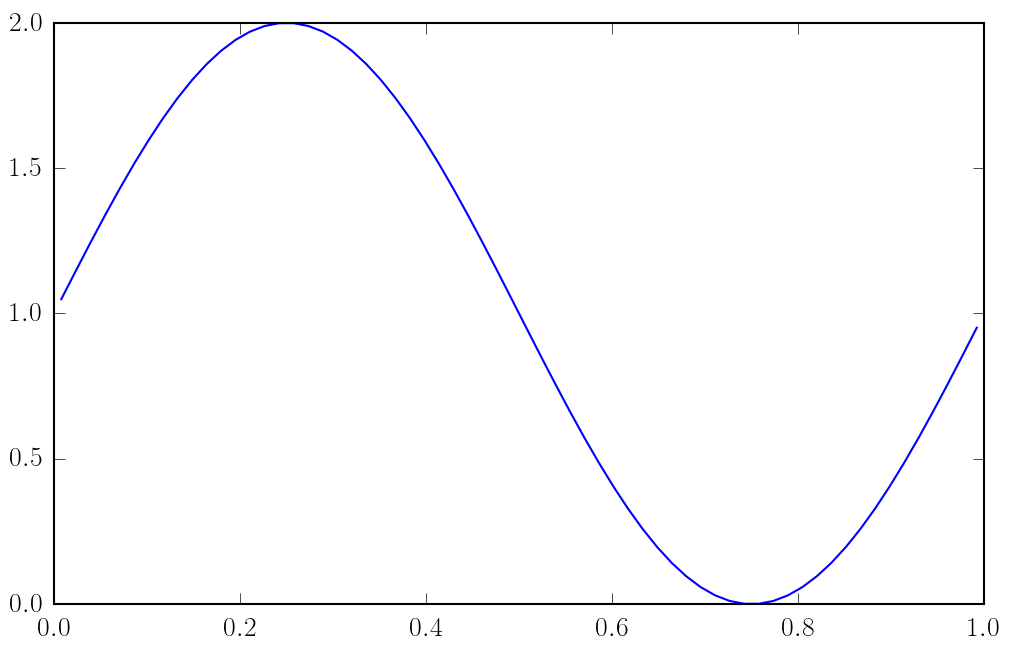

In [10]:
pl.plot(x, rhoInit(x))

In [11]:
gridPoint = N/4
solnVst = np.zeros(Nt)
for n in range(Nt):
    print ("n = ", n)
    integral = quad(rhoIntegrand, -np.inf, np.inf, args=(x[gridPoint], t[n]))
    solnVst[n]  = integral[0]

n =  0
n =  1
n =  2
n =  3
n =  4
n =  5
n =  6
n =  7


/home/hyperion/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


n =  8
n =  9
n =  10
n =  11
n =  12
n =  13
n =  14
n =  15
n =  16
n =  17
n =  18
n =  19
n =  20
n =  21
n =  22
n =  23
n =  24
n =  25
n =  26
n =  27
n =  28
n =  29
n =  30
n =  31
n =  32
n =  33
n =  34
n =  35
n =  36
n =  37
n =  38
n =  39
n =  40
n =  41
n =  42
n =  43
n =  44
n =  45
n =  46
n =  47
n =  48
n =  49
n =  50
n =  51
n =  52
n =  53
n =  54
n =  55
n =  56
n =  57
n =  58
n =  59
n =  60
n =  61
n =  62
n =  63
n =  64
n =  65
n =  66
n =  67
n =  68
n =  69
n =  70
n =  71
n =  72
n =  73
n =  74
n =  75
n =  76
n =  77
n =  78
n =  79
n =  80
n =  81
n =  82
n =  83
n =  84
n =  85
n =  86
n =  87
n =  88
n =  89
n =  90
n =  91
n =  92
n =  93
n =  94
n =  95
n =  96
n =  97
n =  98
n =  99


/home/hyperion/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


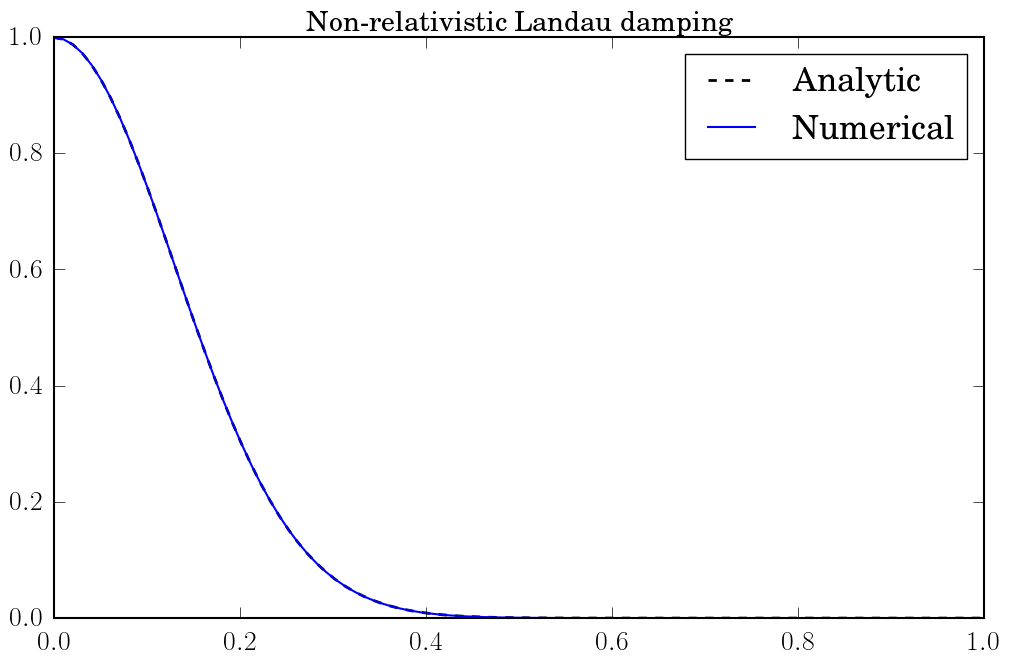

In [12]:
vThermal = np.sqrt(theta0)
pl.plot(t, np.abs(rhoInit(x[gridPoint]) - rho0)*np.exp(-k**2*t**2*vThermal**2./2.), '--', color='black', lw=2, label='Analytic')
pl.plot(t, np.abs(solnVst - rho0), label='Numerical')
pl.title('Non-relativistic Landau damping')
pl.legend()